In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3 MB 7.7 kB/s 


In [2]:
!nvidia-smi

Sat Aug  7 16:33:28 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [29]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential, Model
import numpy as np
import matplotlib.pyplot as plt

In [30]:
train_dir = '/content/drive/MyDrive/DL Datasets/Chest_X-RAY/train'
test_dir = '/content/drive/MyDrive/DL Datasets/Chest_X-RAY/test'

In [31]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 100,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 100,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [33]:
model = Sequential()

model.add(Conv2D(16,(3,3),activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(3, 3))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(3, 3))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(3, 3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [35]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [37]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
53/53 [==============================] - 226s 4s/step - loss: 0.1495 - accuracy: 0.9406 - val_loss: 0.2508 - val_accuracy: 0.9054
Epoch 2/5
53/53 [==============================] - 223s 4s/step - loss: 0.1386 - accuracy: 0.9490 - val_loss: 0.3985 - val_accuracy: 0.8798
Epoch 3/5
53/53 [==============================] - 224s 4s/step - loss: 0.1395 - accuracy: 0.9488 - val_loss: 0.4309 - val_accuracy: 0.8413
Epoch 4/5
53/53 [==============================] - 222s 4s/step - loss: 0.1164 - accuracy: 0.9517 - val_loss: 0.4522 - val_accuracy: 0.8622
Epoch 5/5
53/53 [==============================] - 222s 4s/step - loss: 0.1307 - accuracy: 0.9503 - val_loss: 0.4278 - val_accuracy: 0.8734


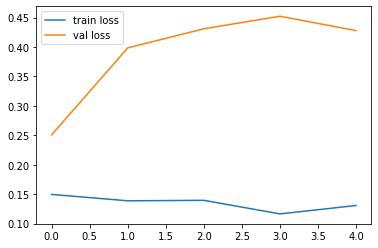

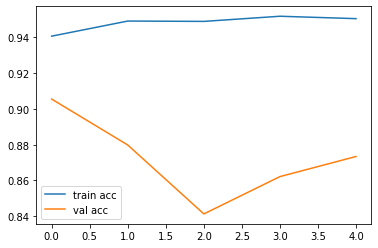

<Figure size 432x288 with 0 Axes>

In [38]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [39]:
model.save('/content/drive/MyDrive/Colab Notebooks/PneumoniaDetection.h5')